In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluation Metrics for Regression Models

## 1. Mean Squared Error (MSE)

### Formula:
\\[
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2
\\]

### Where:
- \\( n \\) = number of samples
- \\( y_i \\) = actual value
- \\( \hat{y_i} \\) = predicted value

### Interpretation:
- Measures the average squared difference between actual and predicted values
- Lower values indicate better fit
- Sensitive to outliers (due to squaring)
- Units are squared of the target variable

---

## 2. Coefficient of Determination (R²)

### Formula:
\\[
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
\\]

### Where:
- \\( \bar{y} \\) = mean of actual values
- Other terms same as MSE formula

### Interpretation:
- Represents proportion of variance in dependent variable explained by model
- Range: [0, 1] (1 = perfect fit, 0 = no explanatory power)
- Can be negative if model performs worse than horizontal line

# Linear Regression Coefficients Derivation via MSE Minimization

## Mathematical Derivation

We find the slope (a) and intercept (b) by minimizing the Mean Squared Error (MSE):

### 1. Problem Formulation
Given data points $(x_i, y_i)$, we want to find:
$$
\hat{y_i} = a x_i + b
$$
that minimizes:
$$
MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i})^2
$$

### 2. Partial Derivatives
We take partial derivatives of MSE with respect to both parameters:

#### For intercept (b):
$$
\frac{\partial MSE}{\partial b} = -\frac{2}{n}\sum_{i=1}^n (y_i - a x_i - b)
$$

#### For slope (a):
$$
\frac{\partial MSE}{\partial a} = -\frac{2}{n}\sum_{i=1}^n x_i(y_i - a x_i - b)
$$

### 3. Closed-form Solutions
Setting derivatives to zero yields:

$$
b = \bar{y} - a \bar{x}
$$

$$
a = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

Where $\bar{x}$ and $\bar{y}$ are the means of x and y respectively.

In [19]:
def linear_regression(x, y):
    n = len(x)
    # Calculate means
    x_mean = np.mean(x)
    y_mean = np.mean(y) 
    # Calculate slope (a)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)
    a = numerator / denominator
    # Calculate intercept (b)
    b = y_mean - a * x_mean
    
    return a, b

# Original data
x = np.linspace(0, 10, 100)
y = 2*x + 3

# Add Gaussian noise (mean=0, std=1)
noise = np.random.normal(0, 1, len(x))
y_noisy = y + noise

# Calculate coefficients
a, b = linear_regression(x, y_noisy)
y_pred = a*x + b

In [20]:
# Verify with scikit-learn
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x.reshape(-1,1), y)
a_sklearn = model.coef_[0]
b_sklearn = model.intercept_

print(f"Manual Calculation: y = {a:.4f}x + {b:.4f}")
print(f"Scikit-learn: y = {a_sklearn:.4f}x + {b_sklearn:.4f}")

Manual Calculation: y = 1.9685x + 2.9489
Scikit-learn: y = 2.0000x + 3.0000


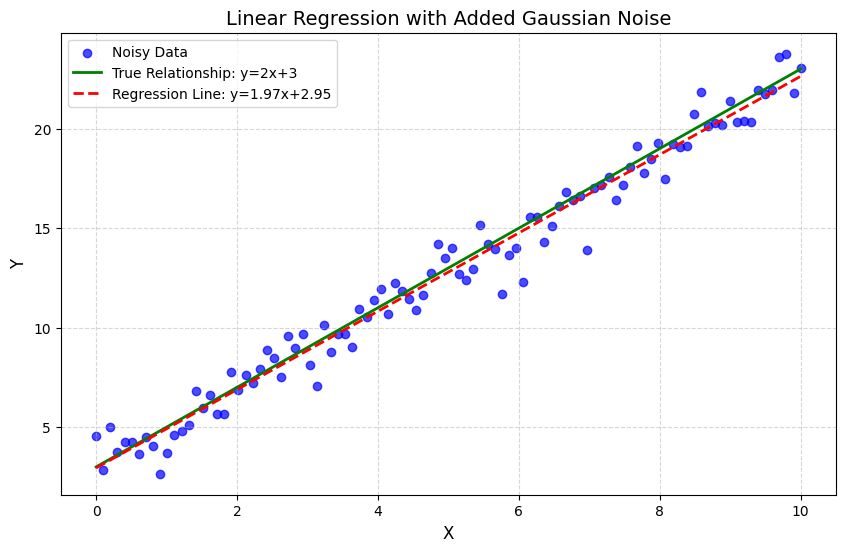

In [21]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, color='blue', label='Noisy Data', alpha=0.7)
plt.plot(x, y, 'g-', linewidth=2, label='True Relationship: y=2x+3')
plt.plot(x, y_pred, 'r--', linewidth=2, label=f'Regression Line: y={a:.2f}x+{b:.2f}')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Linear Regression with Added Gaussian Noise', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Finish